In [1]:
# https://www.kaggle.com/datasets/zain280/car-dataset 
# LINK TO DATA
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

rawDF = pd.read_csv("Car_Data.csv")

rawDF.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [2]:
rawDF.describe()

,ID,Year,Mileage,Price
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2006.03409,99819.395000,42534.519370
std,28867.657797,9.52722,57710.087058,21632.296692
min,1.000000,1990.00000,2.000000,5000.000000
25%,25000.750000,1998.00000,49996.250000,23826.750000
50%,50000.500000,2006.00000,99807.000000,42563.500000
75%,75000.250000,2014.00000,149841.250000,61197.500000
max,100000.000000,2022.00000,199998.000000,80000.000000


In [3]:
rawDF.isna().sum()


ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [4]:
# lists of col names
categoricalCols = ["Model", "Condition", "Year", "Color", "Brand"]
numericalCols = ["Mileage", "Price"]

In [5]:
# func for bar charts
def makeBarCount(myDF, colName, width, height):
    plt.figure()
    myDF[colName].value_counts().plot(kind='bar', figsize=(width, height))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Count of Entries In {colName} Column", y=1.02)

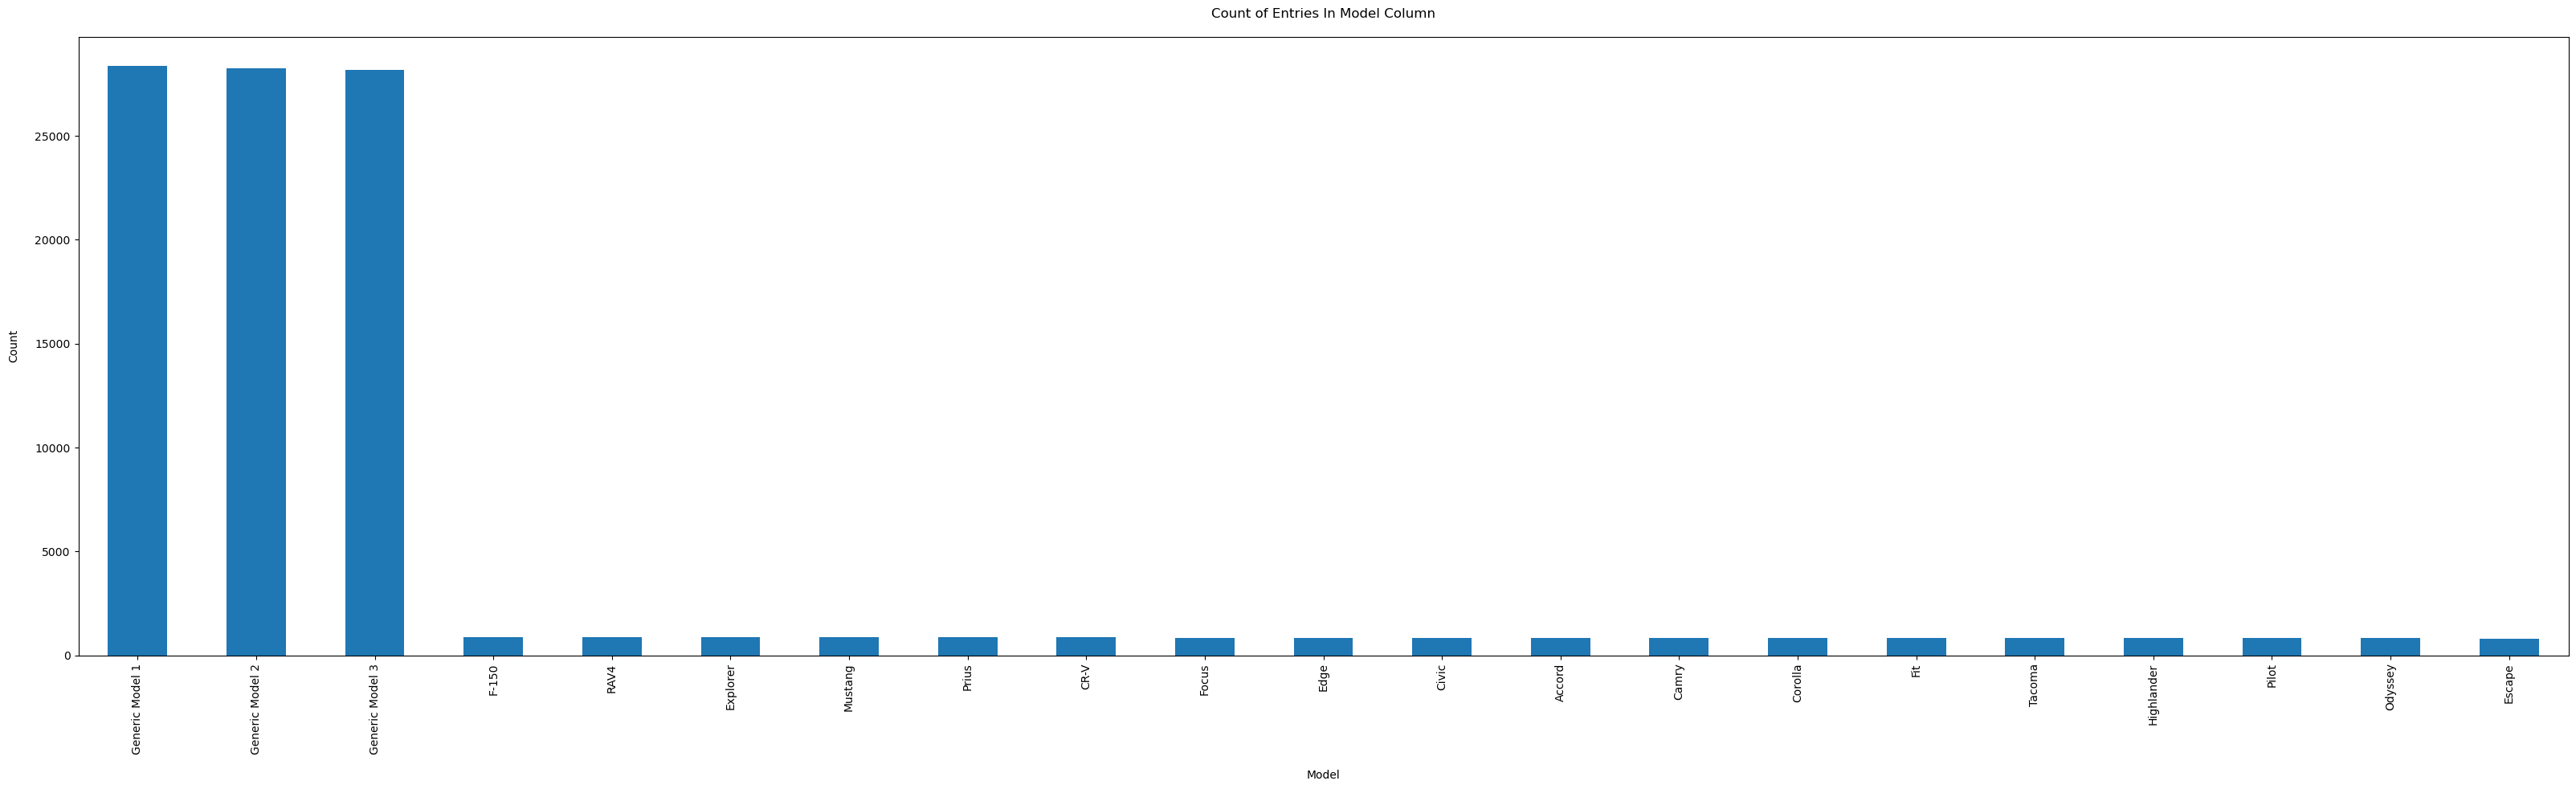

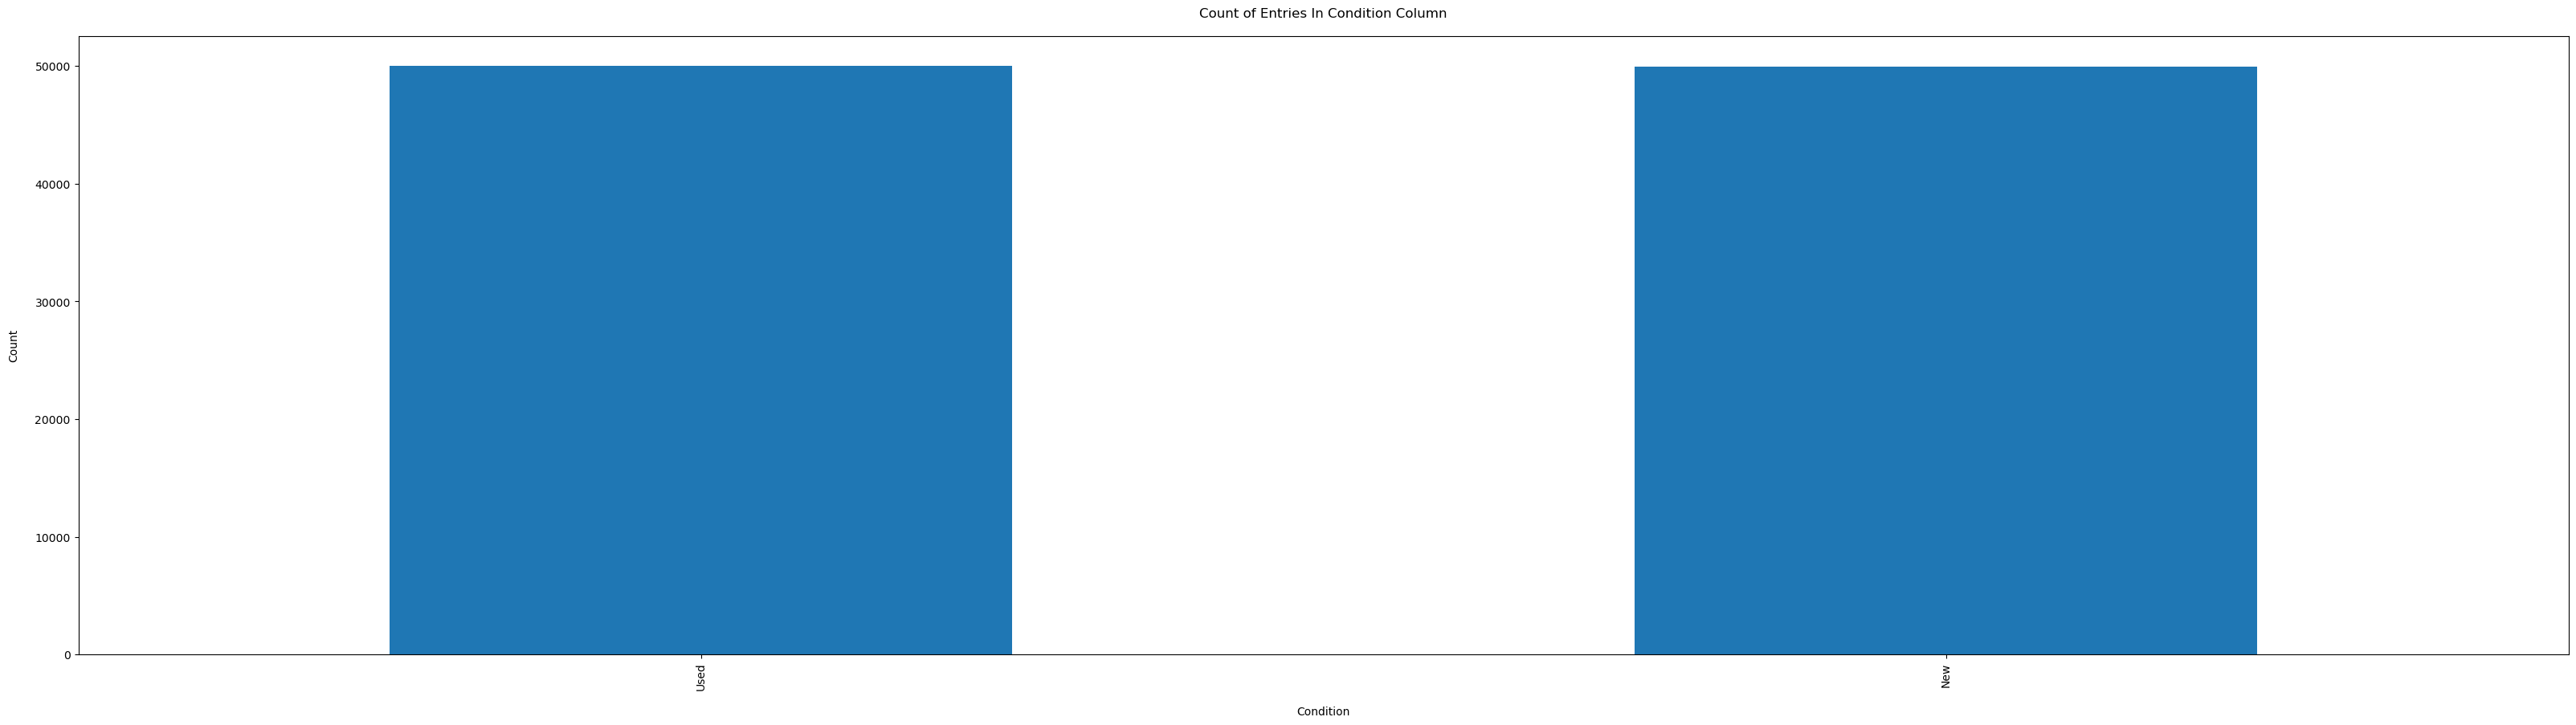

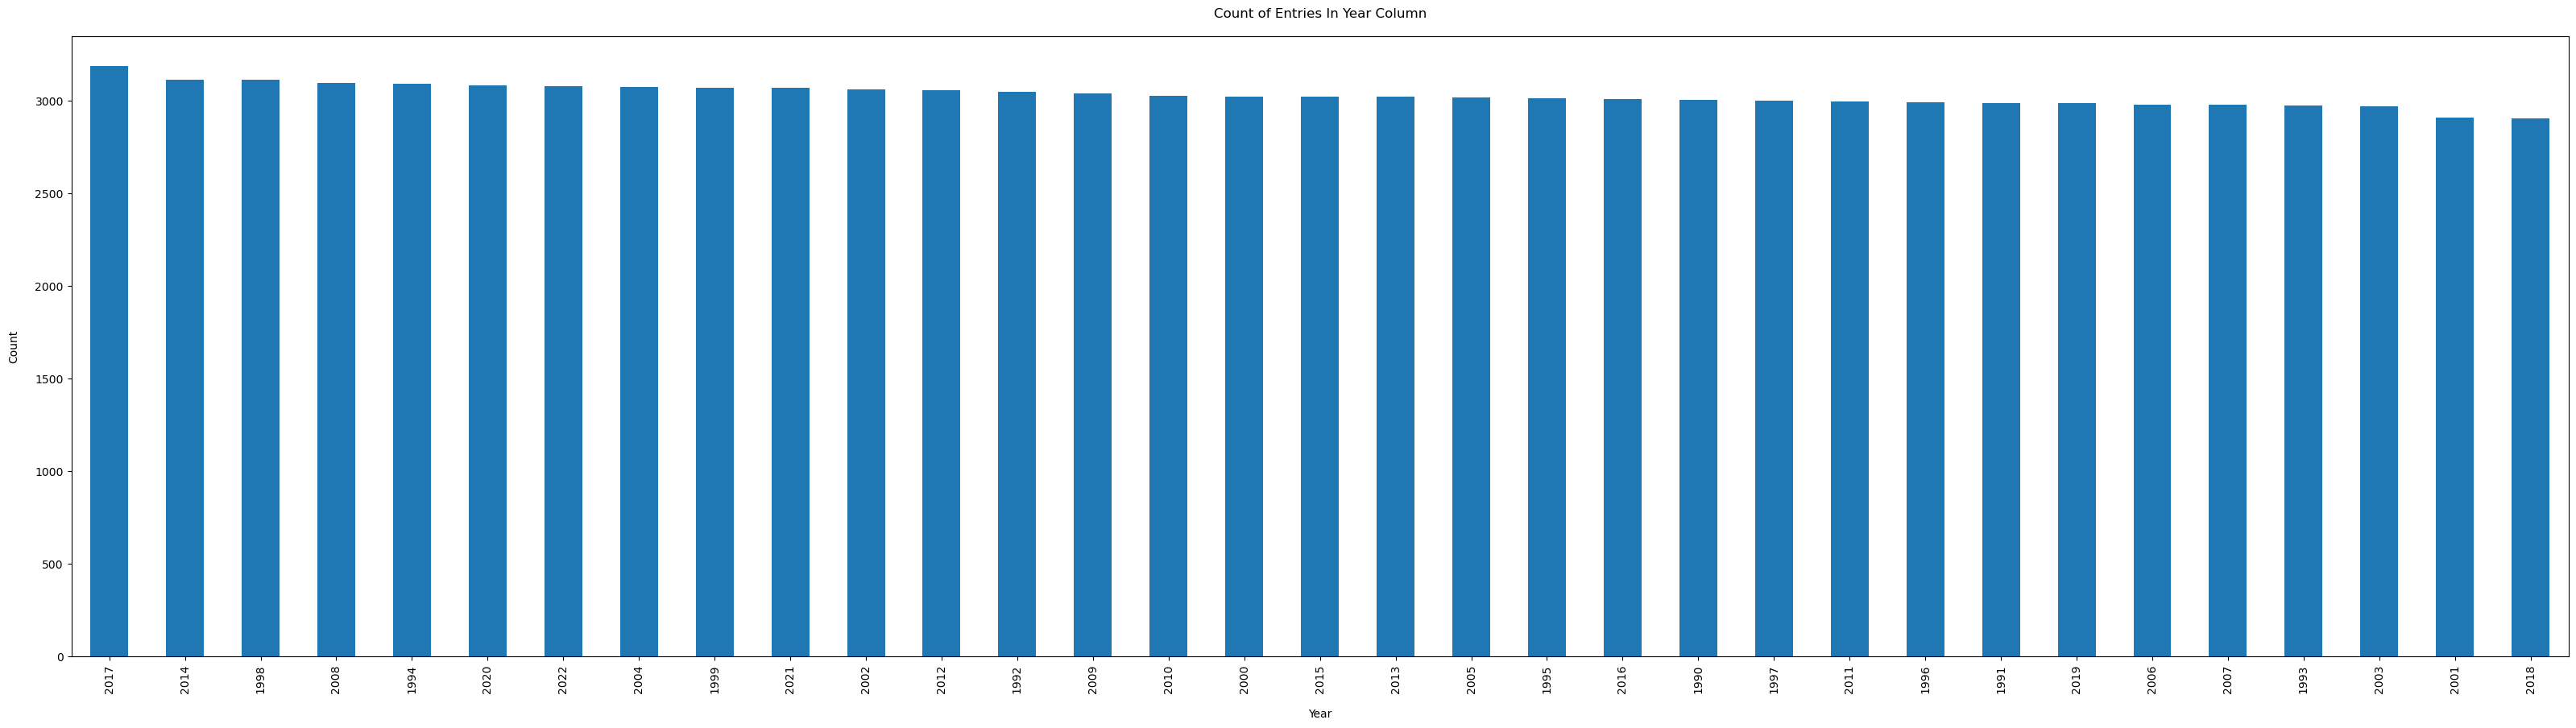

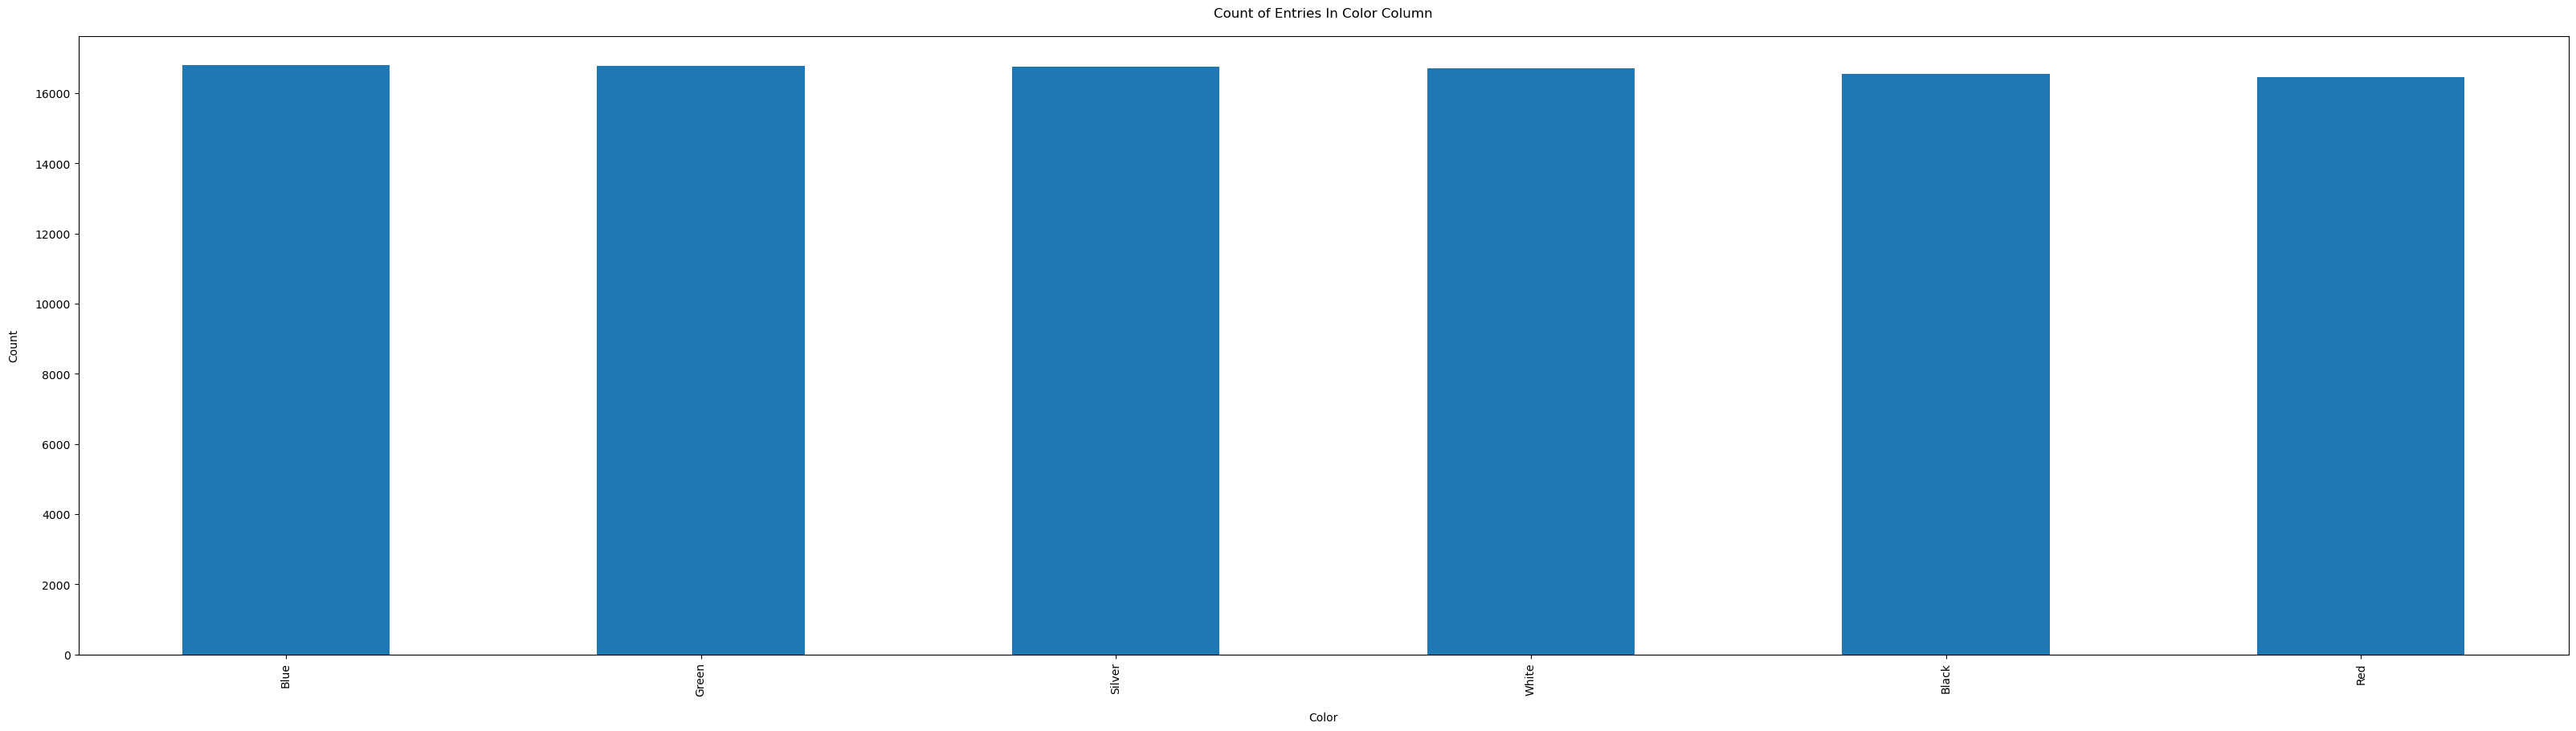

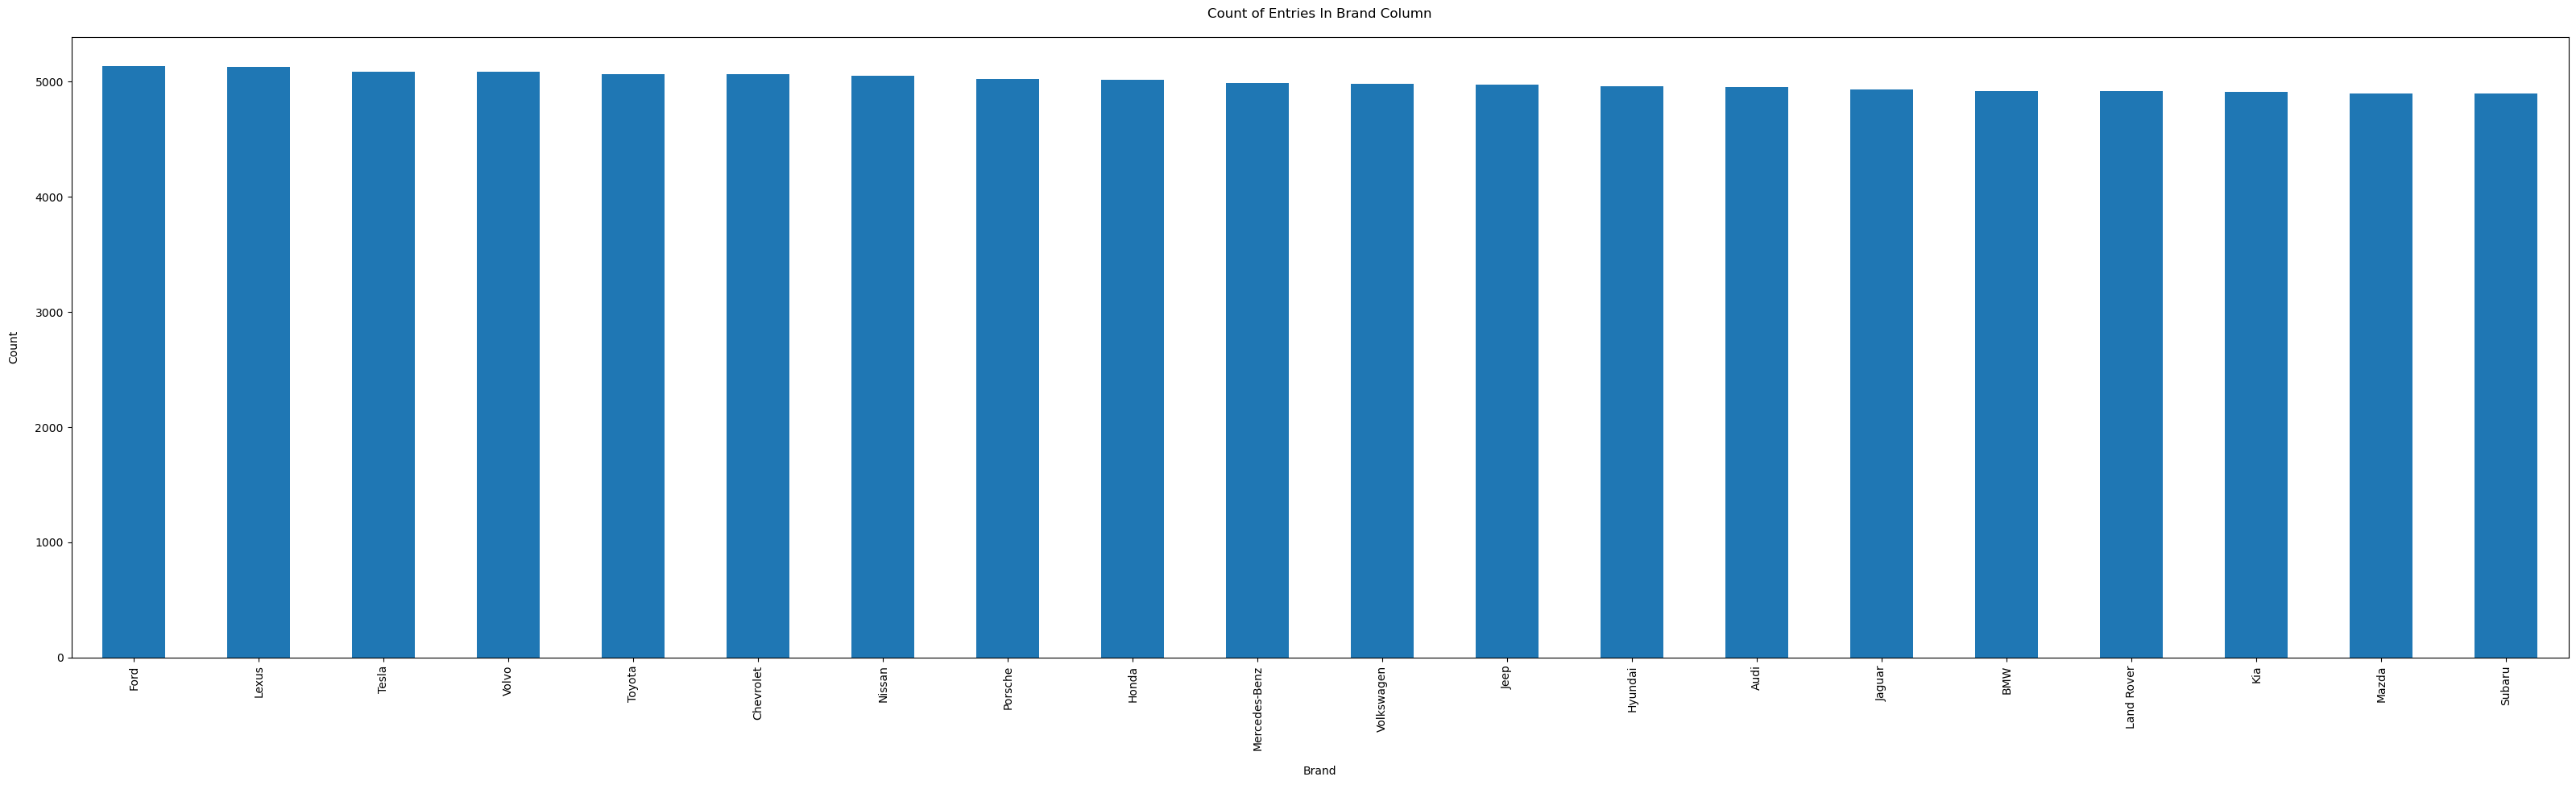

In [6]:
# make bar charts for all categorical data

for col in categoricalCols:
    makeBarCount(rawDF, col, 40, 10)

In [7]:
# func for histograms
def makeHistogram(myDF, colName, width, height):
    plt.figure(figsize=(width, height))
    plt.hist(myDF[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Distribution of {colName} Column", y=1.02)

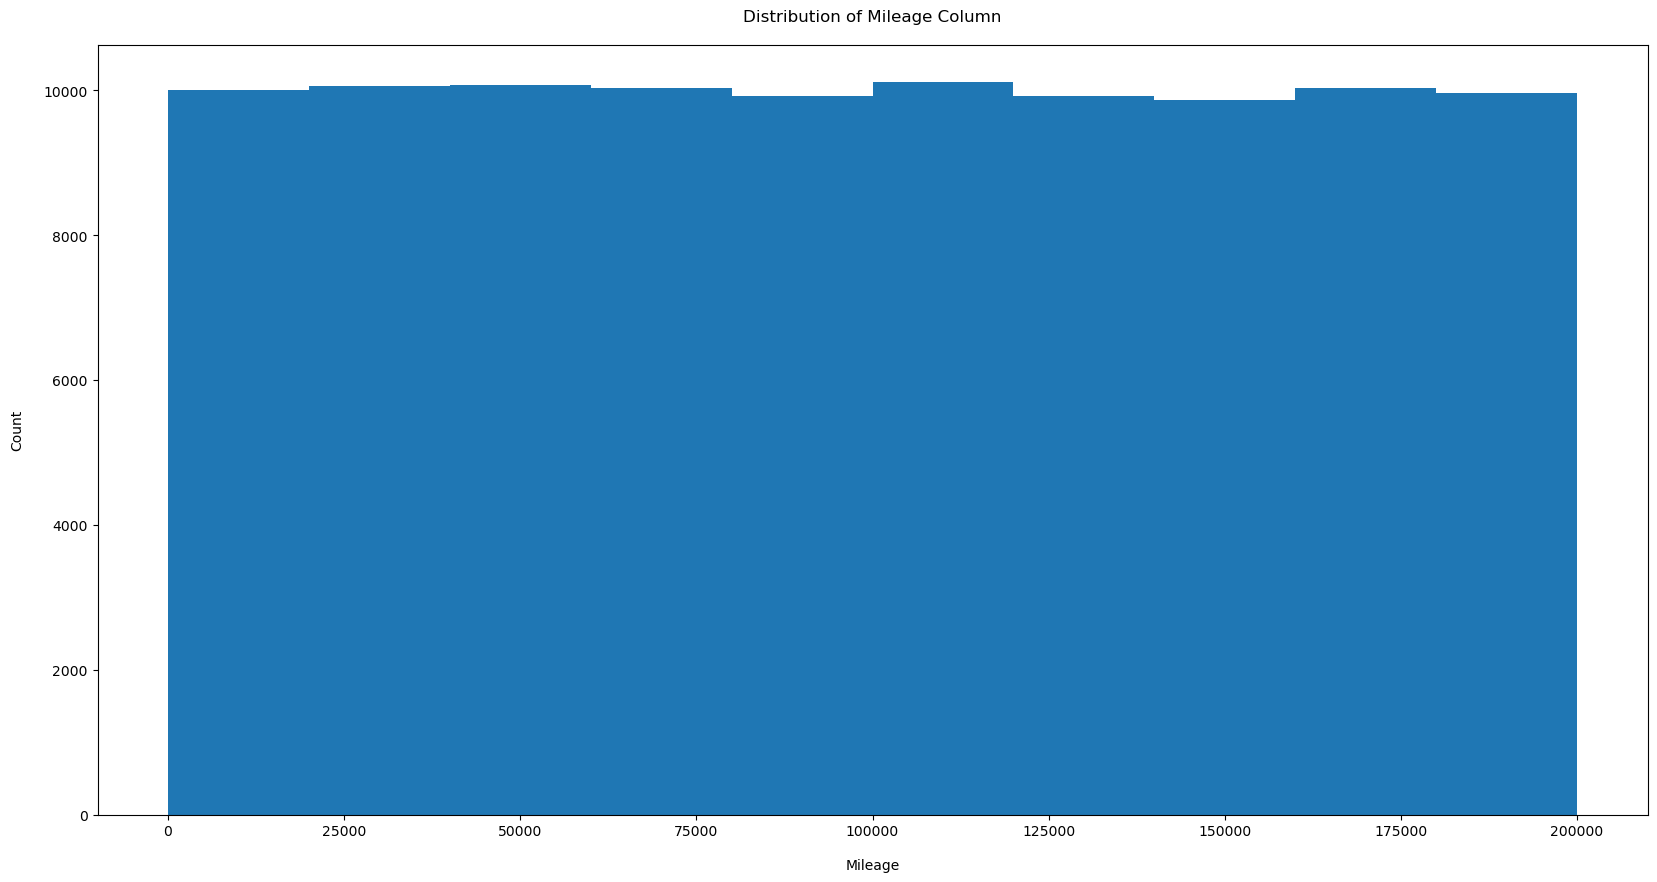

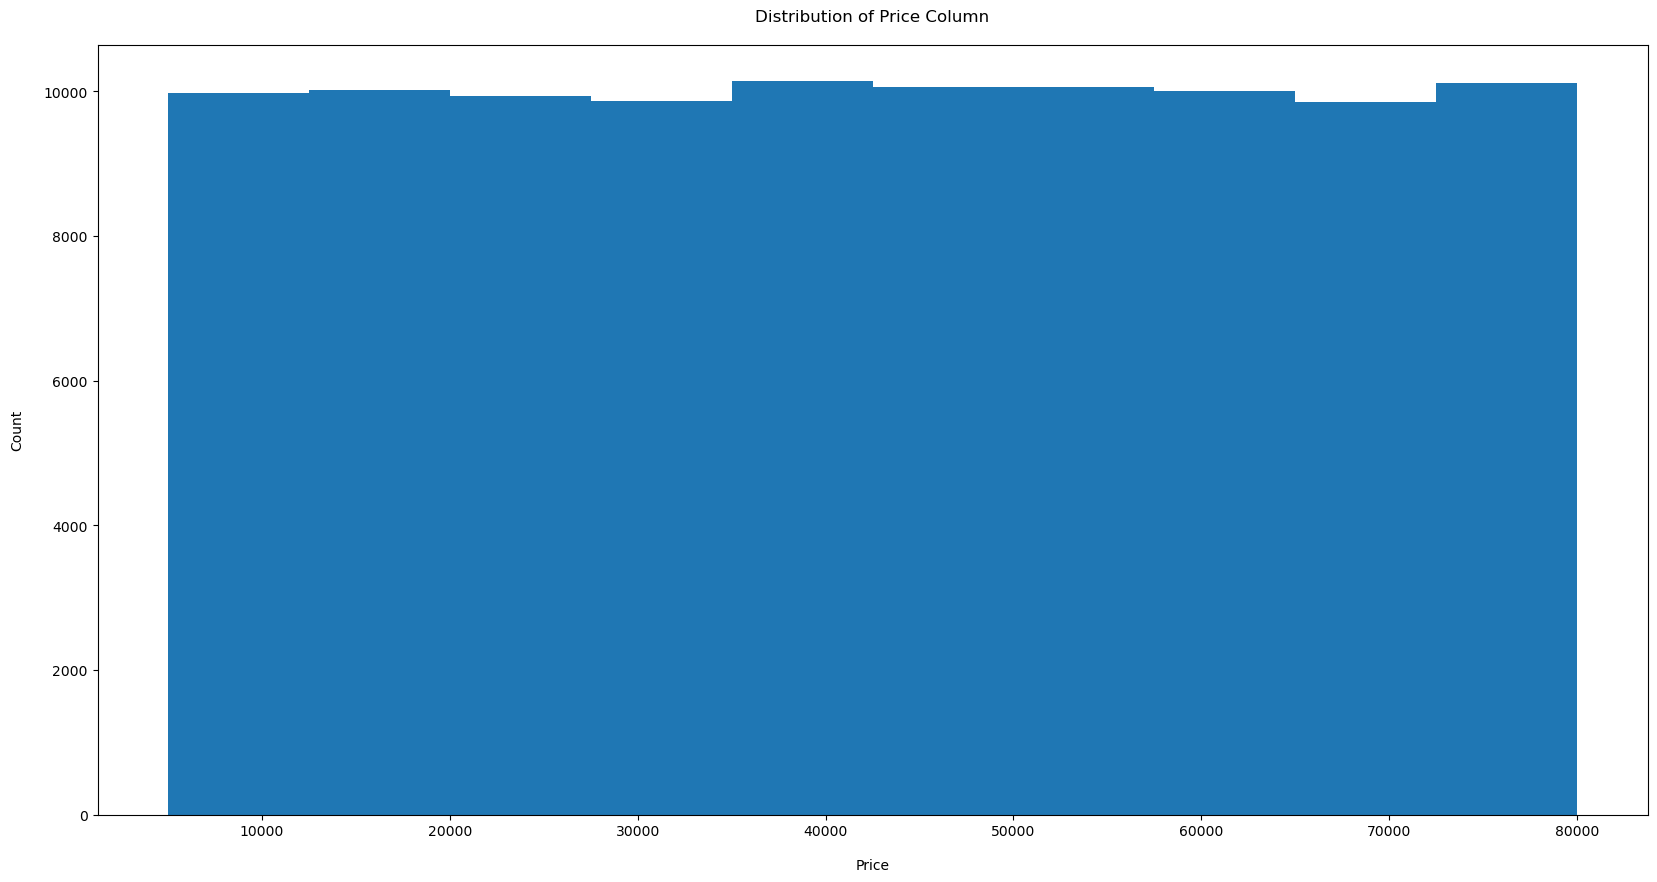

In [8]:
for col in numericalCols:
    makeHistogram(rawDF, col, 20, 10)

In [9]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

conditionList = ["Used", "New"]


rawDF["Condition"] = rawDF["Condition"].replace(conditionList, getLabelList(len(conditionList)))

rawDF.tail(15)

/var/folders/5t/b7ct2qp10bz6lb5ynlzg7s880000gn/T/ipykernel_54813/257174907.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rawDF["Condition"] = rawDF["Condition"].replace(conditionList, getLabelList(len(conditionList)))


,ID,Brand,Model,Year,Color,Mileage,Price,Condition
99985,99986,Tesla,Generic Model 3,2015,Black,125161,45719,0
99986,99987,Mercedes-Benz,Generic Model 1,1996,Blue,119951,42604,0
99987,99988,Hyundai,Generic Model 2,1992,Black,164737,21911,1
99988,99989,Jeep,Generic Model 1,1998,White,36794,17415,0
99989,99990,Mazda,Generic Model 3,2008,White,91406,60015,1
99990,99991,Hyundai,Generic Model 3,2017,Black,192247,38406,0
99991,99992,Nissan,Generic Model 3,1996,Silver,112471,7521,1
99992,99993,Mazda,Generic Model 3,1995,Green,141216,18936,0
99993,99994,BMW,Generic Model 2,1990,White,5318,15444,0
99994,99995,Mercedes-Benz,Generic Model 3,2016,Black,136911,76137,1


In [10]:
yearList = [1990, 1991, 1992, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

rawDF["Year"] = rawDF["Year"].replace(yearList, getLabelList(len(yearList)))

rawDF.head(5)

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,14,Blue,22932,65732,1
1,2,Jaguar,Generic Model 2,14,Silver,89937,58620,1
2,3,Land Rover,Generic Model 2,33,Green,36616,50574,1
3,4,Porsche,Generic Model 2,8,Black,82812,35436,0
4,5,Land Rover,Generic Model 3,11,Black,184616,63880,0


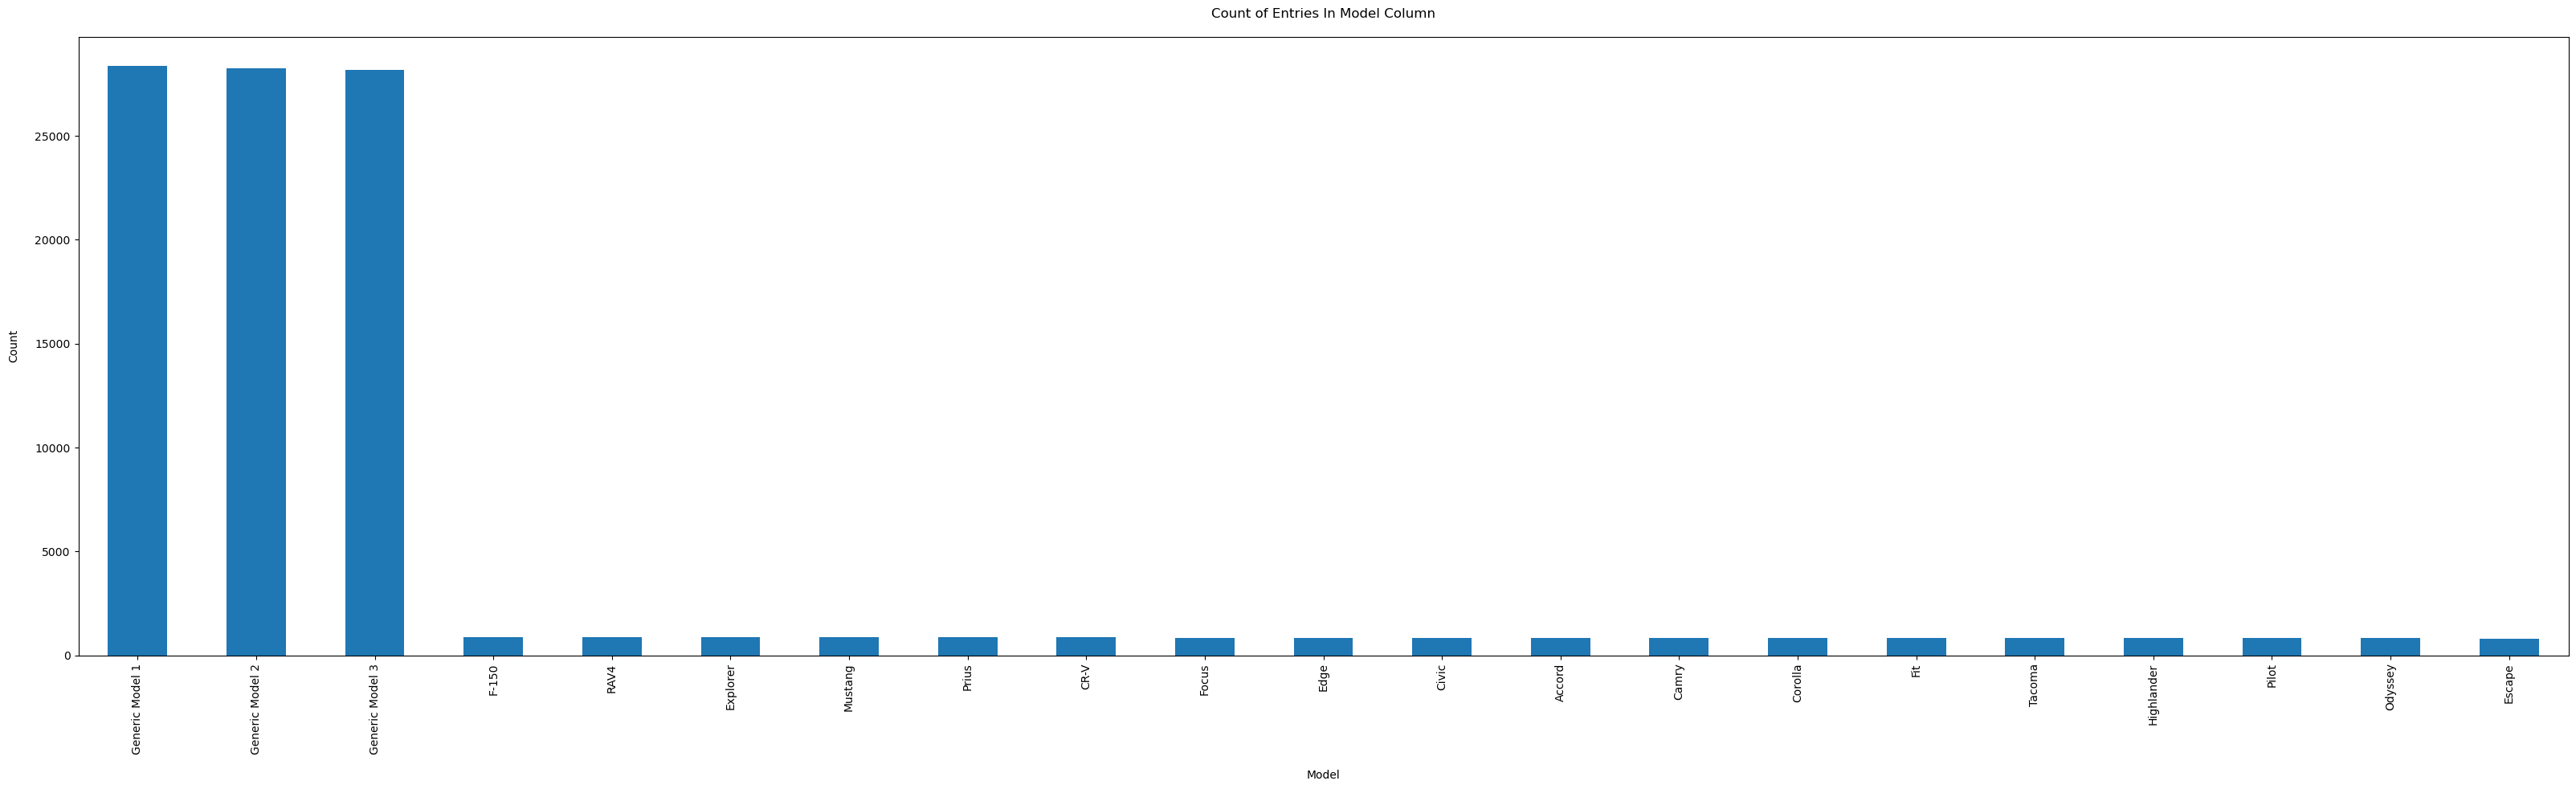

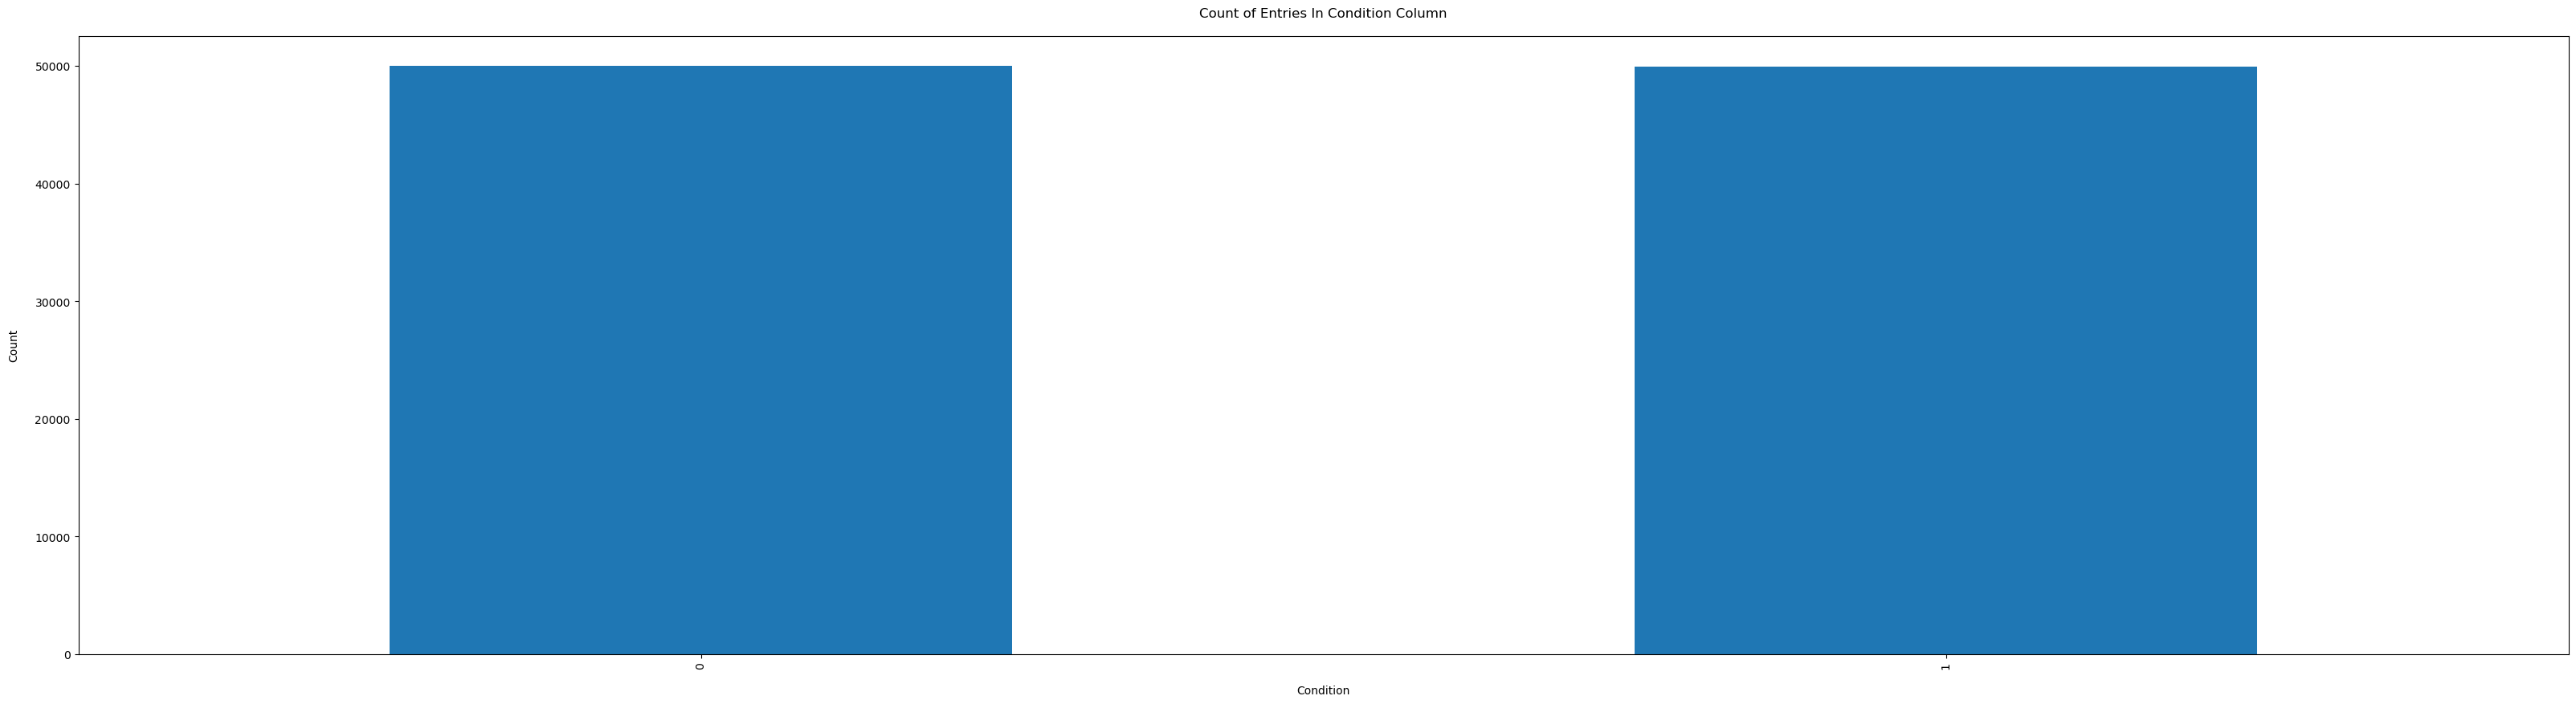

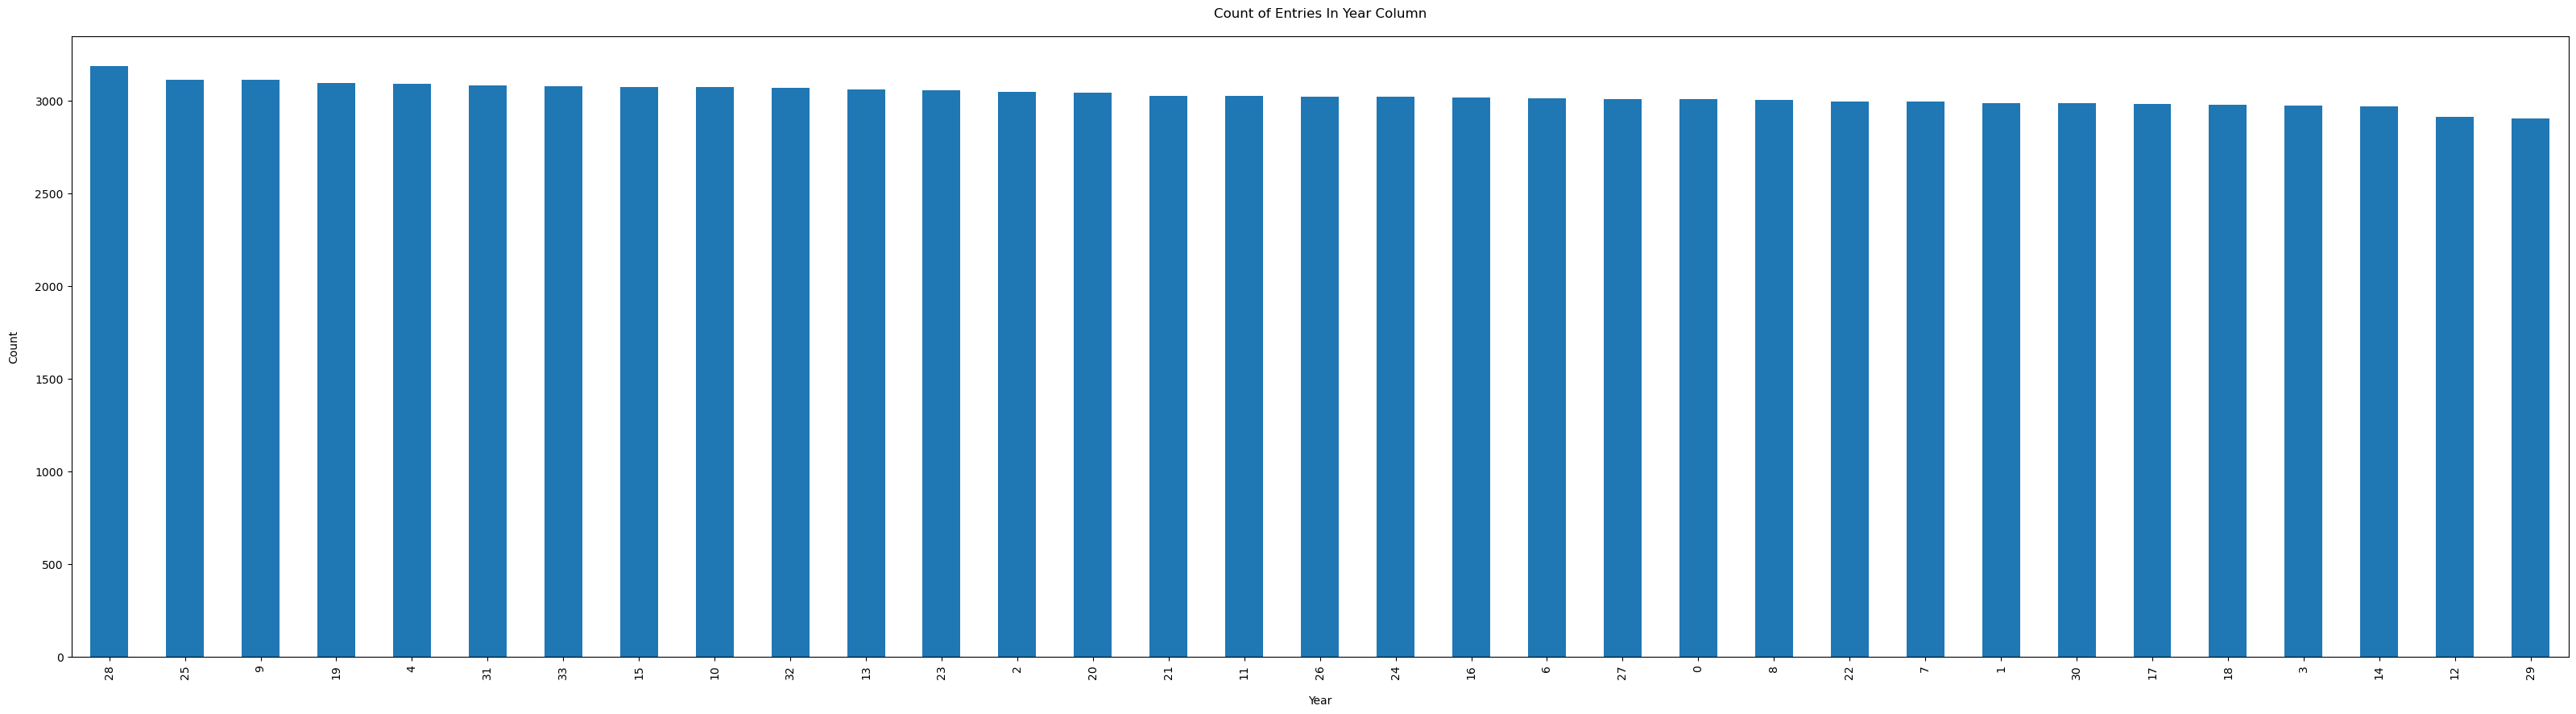

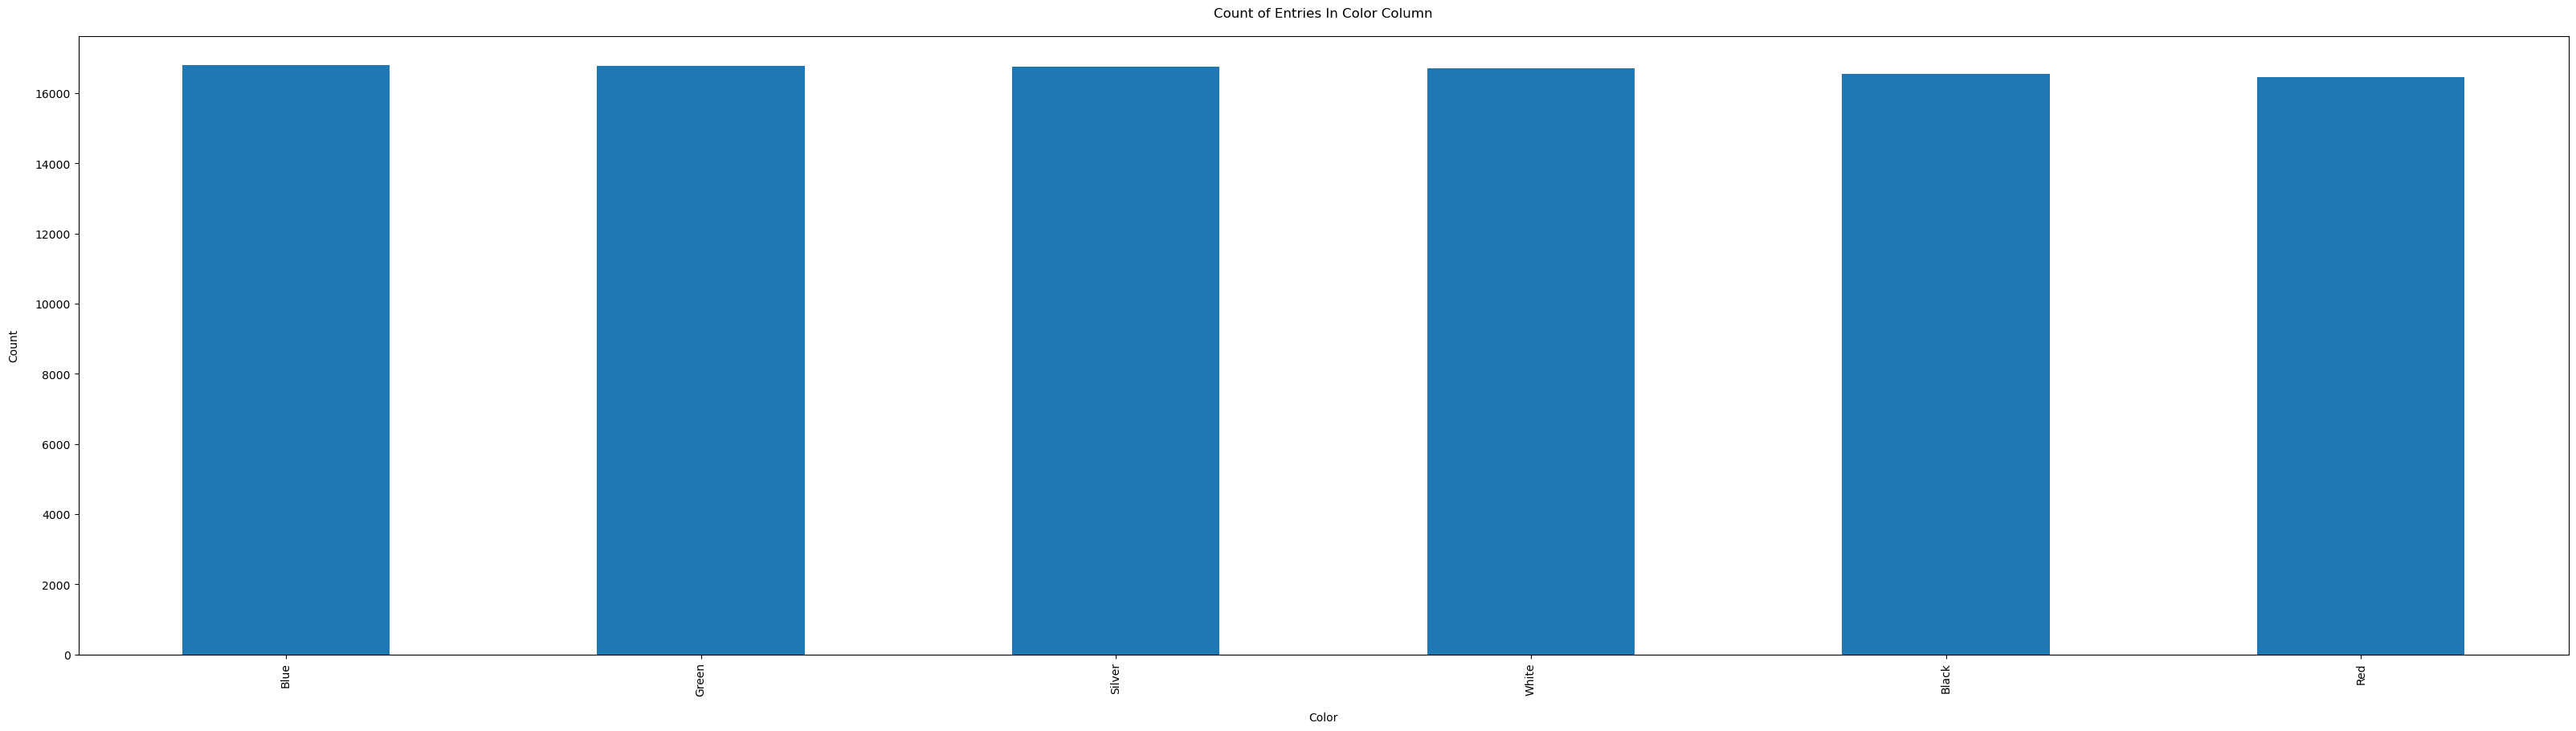

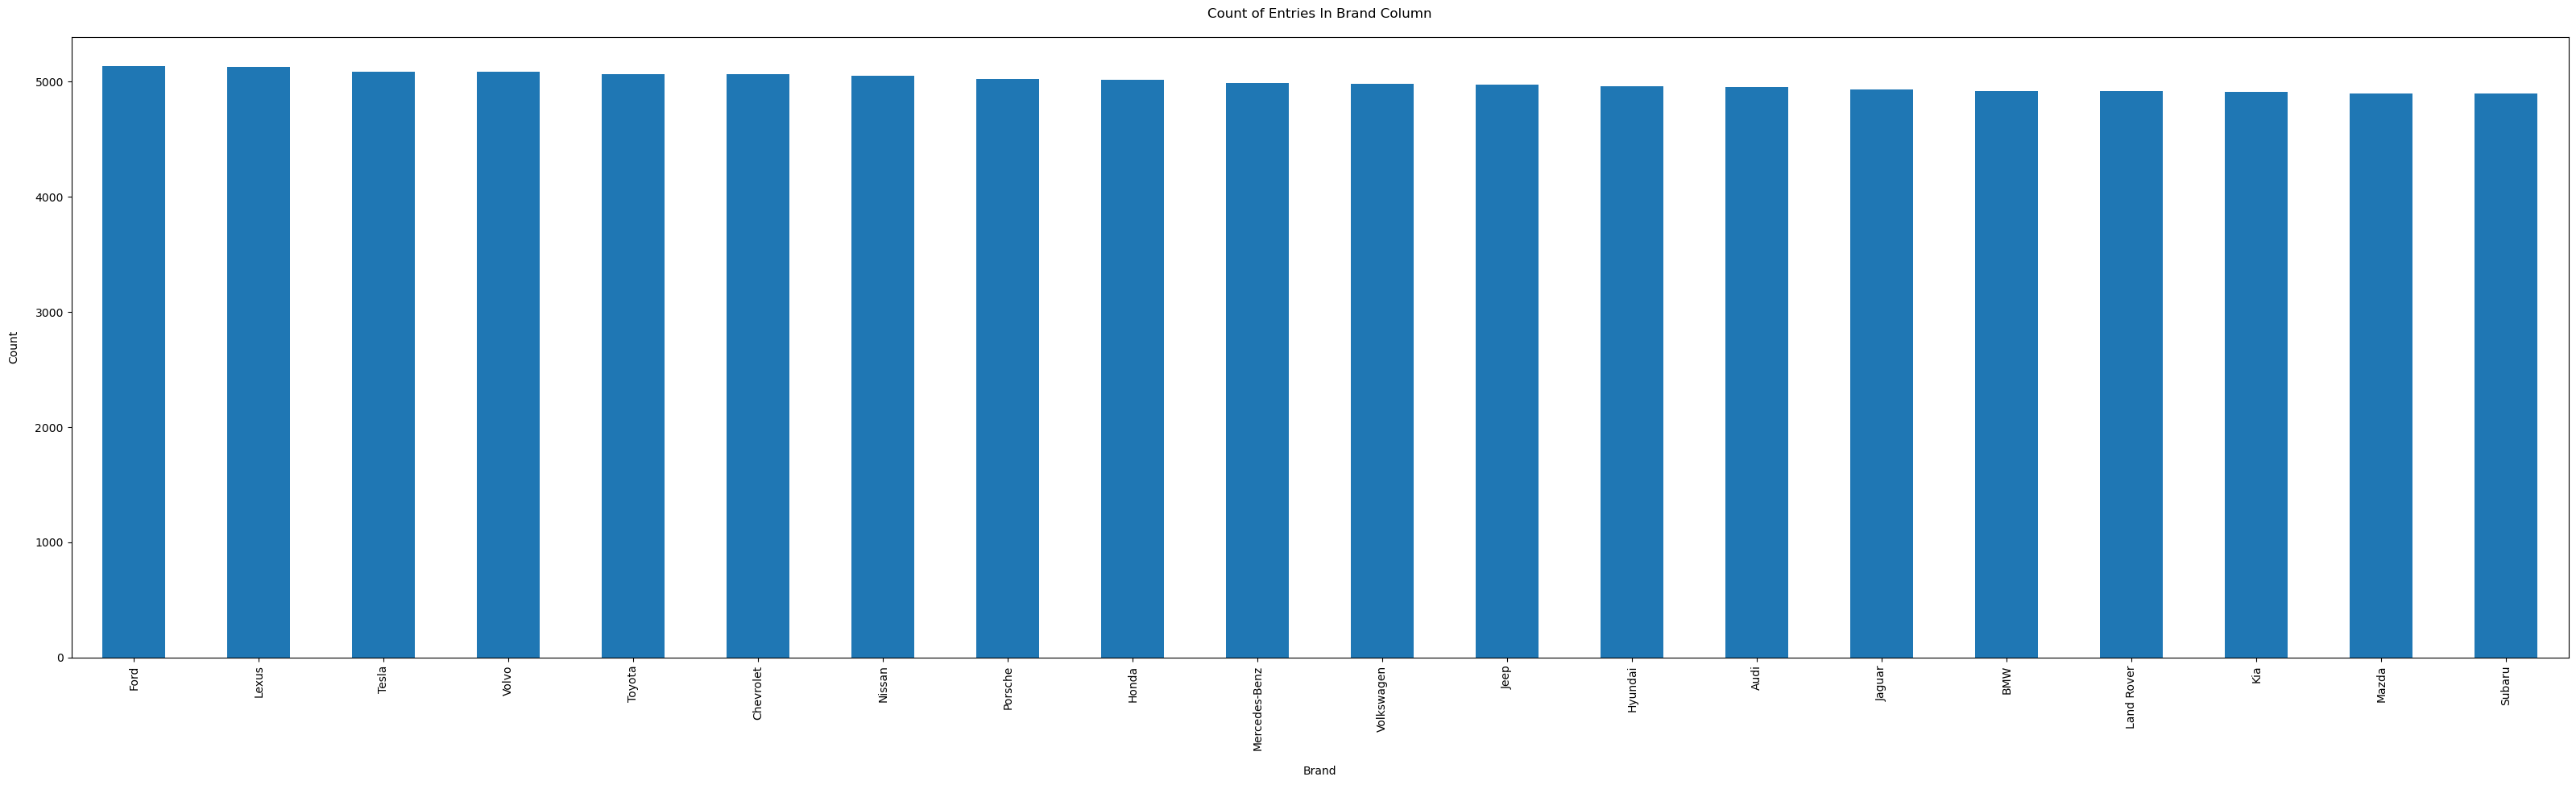

In [11]:
for col in categoricalCols:
    makeBarCount(rawDF, col, 40, 10)

In [12]:
rawDF["Year"].dtype

dtype('int64')

In [13]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Model' column 
encodedData = encoder.fit_transform(rawDF[['Model']])

print(encoder.categories_)

#perform one-hot encoding on 'Condition' column 
encodedData = encoder.fit_transform(rawDF[['Color']])

print(encoder.categories_)

#perform one-hot encoding on 'Condition' column 
encodedData = encoder.fit_transform(rawDF[['Brand']])

print(encoder.categories_)

[array(['Accord', 'CR-V', 'Camry', 'Civic', 'Corolla', 'Edge', 'Escape',
       'Explorer', 'F-150', 'Fit', 'Focus', 'Generic Model 1',
       'Generic Model 2', 'Generic Model 3', 'Highlander', 'Mustang',
       'Odyssey', 'Pilot', 'Prius', 'RAV4', 'Tacoma'], dtype=object)]
[array(['Black', 'Blue', 'Green', 'Red', 'Silver', 'White'], dtype=object)]
[array(['Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
       'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz',
       'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)]


/Users/haydenraikes/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/haydenraikes/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/haydenraikes/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneHotDF.head()

,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land Rover,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
oneHotDF.columns = oneHotDF.columns.get_level_values(0)

featuresTrainDF = pd.concat([rawDF, oneHotDF], axis=1).drop(columns = ["Brand", "Model", "Color"])

featuresTrainDF.head()

,ID,Year,Mileage,Price,Condition,Audi,BMW,Chevrolet,Ford,Honda,...,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,1,14,22932,65732,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14,89937,58620,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,33,36616,50574,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8,82812,35436,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,11,184616,63880,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Not sure why, doesn't seem like my oneHotDF merged into this...

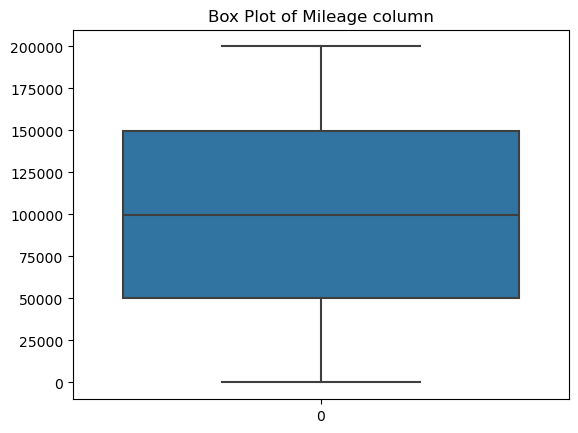

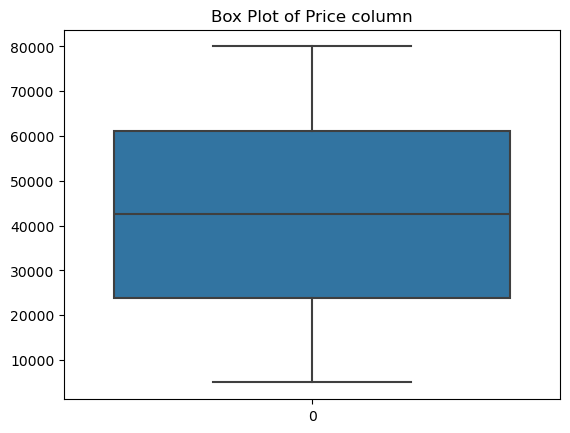

In [16]:
# create boxplots for outliers
for i in range(len(numericalCols)):
    col = numericalCols[i]
    plt.figure(i)
    sns.boxplot(featuresTrainDF[col])
    plt.title(f"Box Plot of {col} column")

I do not see any outliers, which is odd because this is an uncleaned dataset. I will clean anyway.

In [17]:
import numpy as np

featuresTrainCleanedDF = featuresTrainDF

print(featuresTrainCleanedDF.shape)

for col in numericalCols:

    Q1 = np.percentile(featuresTrainDF[col], 25, interpolation='midpoint')
    Q3 = np.percentile(featuresTrainDF[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR

    print(f"col: {col}    minThreshold: {minThreshold}      maxThreshold: {maxThreshold}")

    featuresTrainCleanedDF = featuresTrainCleanedDF[featuresTrainDF[col] < maxThreshold]
    featuresTrainCleanedDF = featuresTrainCleanedDF[featuresTrainCleanedDF[col] > minThreshold]

featuresTrainCleanedDF.shape

(100000, 25)
col: Mileage    minThreshold: -99773.5      maxThreshold: 299610.5
col: Price    minThreshold: -32230.75      maxThreshold: 117255.25


(100000, 25)

In [18]:
featuresTrainCleanedDF = featuresTrainCleanedDF.reset_index().drop(columns="index")

yDF = pd.DataFrame(featuresTrainCleanedDF["Condition"])

yDF.head()

,Condition
0,1
1,1
2,1
3,0
4,0


In [19]:
xDF = featuresTrainCleanedDF.drop(columns="Condition")

xDF.head()

,ID,Year,Mileage,Price,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,...,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,1,14,22932,65732,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14,89937,58620,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,33,36616,50574,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8,82812,35436,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,11,184616,63880,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print(xDF.shape)
print(yDF.shape)

(100000, 24)
(100000, 1)


In [21]:
# split training and testing set
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                shuffle=True)

xTrain.head()

,ID,Year,Mileage,Price,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,...,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
17905,17906,25,63469,64694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93163,93164,3,8157,63840,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46166,46167,10,82920,40235,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3422,3423,14,57861,13290,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88329,88330,19,20037,69563,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# Standardization
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
yScaler = StandardScaler()

colNames = xTrain.columns.values.tolist()
xTrain[colNames] = xScaler.fit_transform(xTrain[colNames])

colNames = yTrain.columns.values.tolist()
yTrain[colNames] = yScaler.fit_transform(yTrain[colNames])

# view result
xTrain.head()

,ID,Year,Mileage,Price,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,...,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
17905,-1.112352,0.833443,-0.628201,1.027413,-0.229761,-0.227443,-0.231375,-0.233118,-0.22831,-0.22824,...,-0.232572,-0.226538,-0.227199,4.350401,-0.229174,-0.227755,-0.232743,-0.230139,-0.230105,-0.232675
93163,1.493551,-1.419908,-1.585860,0.987896,-0.229761,-0.227443,-0.231375,-0.233118,-0.22831,-0.22824,...,-0.232572,-0.226538,-0.227199,4.350401,-0.229174,-0.227755,-0.232743,-0.230139,-0.230105,-0.232675
46166,-0.133779,-0.702933,-0.291430,-0.104370,-0.229761,-0.227443,-0.231375,4.289677,-0.22831,-0.22824,...,-0.232572,-0.226538,-0.227199,-0.229864,-0.229174,-0.227755,-0.232743,-0.230139,-0.230105,-0.232675
3422,-1.613844,-0.293233,-0.725296,-1.351188,-0.229761,-0.227443,-0.231375,-0.233118,-0.22831,-0.22824,...,-0.232572,-0.226538,-0.227199,-0.229864,-0.229174,-0.227755,-0.232743,-0.230139,-0.230105,-0.232675
88329,1.326168,0.218893,-1.380173,1.252715,-0.229761,-0.227443,-0.231375,-0.233118,-0.22831,-0.22824,...,-0.232572,-0.226538,-0.227199,-0.229864,-0.229174,4.390683,-0.232743,-0.230139,-0.230105,-0.232675


In [23]:
yTrain.head()

,Condition
17905,-0.998202
93163,-0.998202
46166,1.001802
3422,1.001802
88329,-0.998202


In [24]:
yTest.head()


,Condition
46361,1
68555,0
16070,1
19531,0
59838,1


Training using SVM, linear regression, MLP, and neural nets

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

-6.13157834464422e+23
391508423513.10693


In [27]:
from sklearn import tree

dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

-8.50788774059207
1.4388806840986847


In [28]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

In [29]:
# define a dataframe where we can make a prediction

predXDict = {'Brand': ["Ford"], 
             'Model': ["F-250"],
             'Year': [2022],
             'Color': ["Black"],
             'Mileage': [30000],
             'Price': [90000],
             'Condition': ["New"]}

predXDF = pd.DataFrame.from_dict(predXDict)

predXDF.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Ford,F-250,2022,Black,30000,90000,New


In [30]:
conditionList = ["Used", "New"]


predXDF["Condition"] = predXDF["Condition"].replace(conditionList, getLabelList(len(conditionList)))



# year column
yearList = [1990, 1991, 1992, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


predXDF["Year"] = predXDF["Year"].replace(yearList, getLabelList(len(yearList)))


predXDF.head()

/var/folders/5t/b7ct2qp10bz6lb5ynlzg7s880000gn/T/ipykernel_54813/1158072335.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predXDF["Condition"] = predXDF["Condition"].replace(conditionList, getLabelList(len(conditionList)))


,Brand,Model,Year,Color,Mileage,Price,Condition
0,Ford,F-250,33,Black,30000,90000,1


In [31]:
encoder.categories_

[array(['Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
        'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz',
        'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [32]:
# use the saved encoder to transform the predicted dataframe

encodedData = encoder.transform(predXDF[['Brand']])


encodedData

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [33]:
oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneHotDF.head()

,Audi,BMW,Chevrolet,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land Rover,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
oneHotDF.columns = oneHotDF.columns.get_level_values(0)

predXDF = pd.concat([predXDF, oneHotDF], axis=1).drop(columns = "Brand")

predXDF.head()

,Model,Year,Color,Mileage,Price,Condition,Audi,BMW,Chevrolet,Ford,...,Lexus,Mazda,Mercedes-Benz,Nissan,Porsche,Subaru,Tesla,Toyota,Volkswagen,Volvo
0,F-250,33,Black,30000,90000,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
colNames = predXDF.columns.values.tolist()
print(colNames)

# use the scaler to transform the prediction data
predXDF[colNames] = xScaler.transform(predXDF[colNames])

predXDF.head()

['Model', 'Year', 'Color', 'Mileage', 'Price', 'Condition', 'Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Color
- Condition
- Model
Feature names seen at fit time, yet now missing:
- ID


In [ ]:
svmPred = svmModel.predict(predXDF)
treePred = dtModel.predict(predXDF)
nnPred = nnModel.predict(predXDF)

svmPred = yScaler.inverse_transform(svmPred.reshape(-1,1))
treePred = yScaler.inverse_transform(treePred.reshape(-1,1))
nnPred = yScaler.inverse_transform(nnPred.reshape(-1,1))

## 
print(f"SVM prediction: {svmPred}")
print(f"Decision tree prediction: {treePred}")
print(f"NN prediction: {nnPred}")